In [1]:
# importing Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

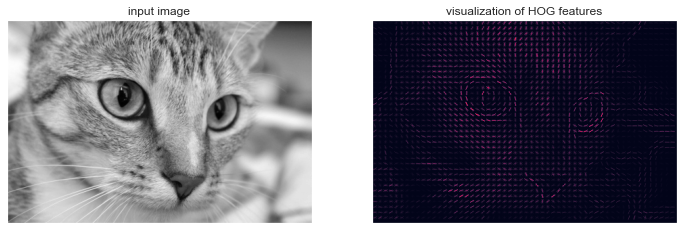

In [2]:
# Using skimage for image processing
from skimage import data, color, feature
import skimage.data

# HOG: Histogram Of Oriented Gradients
image = color.rgb2gray(data.chelsea())


# Setting visualise=True in feature.hog() returns a visualization of the HOG features, aiding in debugging and improving feature extraction efficacy.
hog_vec, hog_vis = feature.hog(image, visualize=True, feature_vector=True, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');


In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [4]:
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = []
for name in imgs_to_use:
    img = getattr(data, name)()
    if len(img.shape) == 3:  # RGB image 
        img = color.rgb2gray(img)
    images.append(img)

In [5]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches
    
negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images
                                  for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

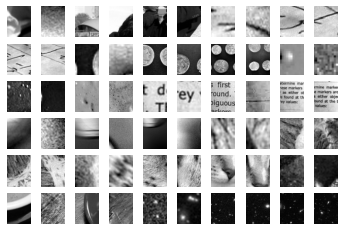

In [6]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [7]:
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [8]:
X_train.shape

(43233, 1215)

In [ ]:
from sklearn.naive_bayes import GaussianNB